# Week6 Time Series 정규세션 과제

### 주가 데이터를 활용하여 자유롭게 시계열분석을 진행해주세요.
### Box-Jenkins 방법론
- 식별
- 추정
- 진단
- 예측

  - decompostion

## 라이브러리 불러오기

In [2]:
!pip install pmdarima --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.8 MB/s eta 0:00:00


In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMAResults

<ipython-input-3-1e3c1defb90d>:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


## 주가 데이터 불러오기
- 예) 삼성 005930.KS

In [4]:
samsung_df = yf.download('005930.KS',
                      start='2020-01-01',
                      end='2021-04-21',
                      progress=False)

samsung_df = samsung_df[["Close"]]

samsung_df = samsung_df.reset_index()

samsung_df.columns = ['day', 'price']

samsung_df['day'] = pd.to_datetime(samsung_df['day'])

samsung_df.index = samsung_df['day']
samsung_df.set_index('day', inplace=True)

samsung_df

,price
day,
2020-01-02,55200.0
2020-01-03,55500.0
2020-01-06,55500.0
2020-01-07,55800.0
2020-01-08,56800.0
...,...
2021-04-14,84000.0
2021-04-15,84100.0
2021-04-16,83900.0


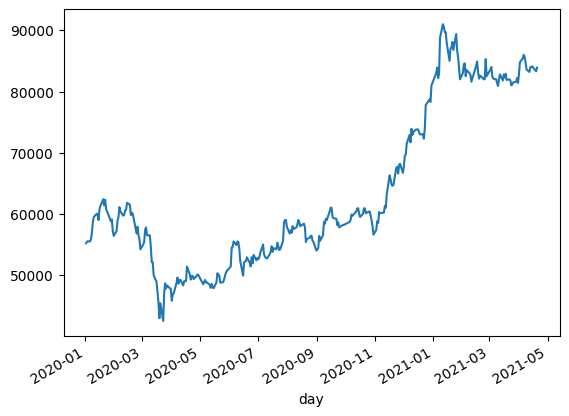

In [7]:
fig = samsung_df['price'].plot()

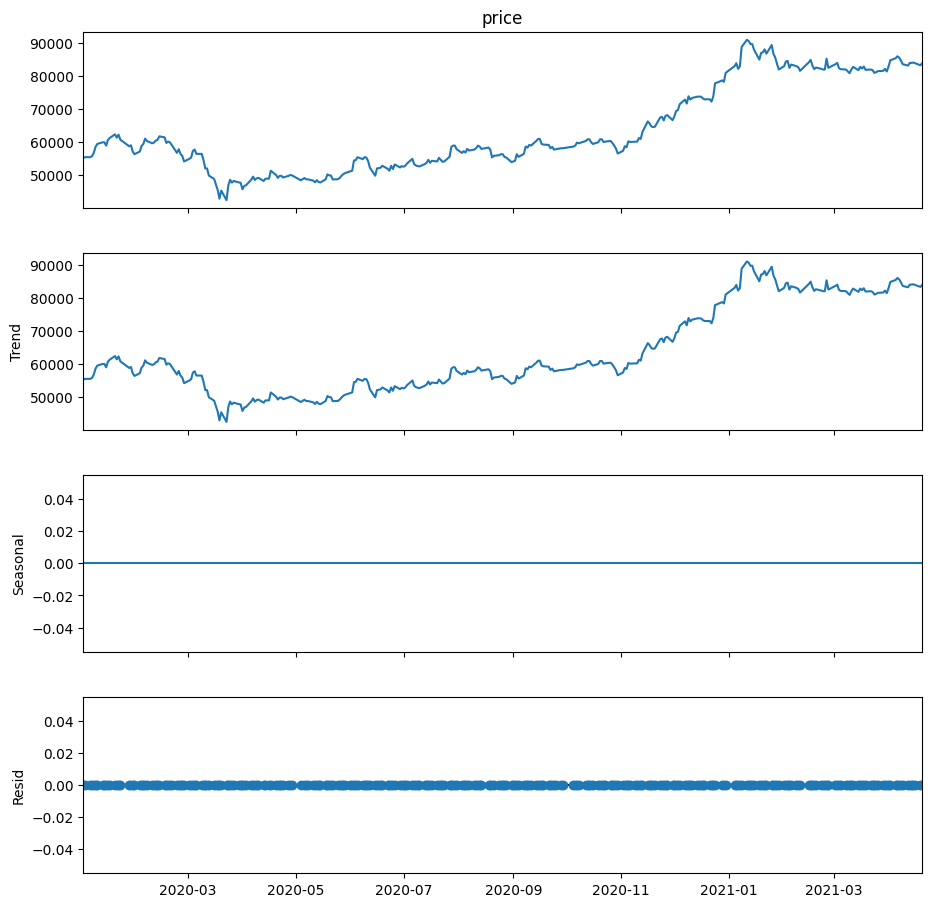

In [10]:
# seasonal decomposition
decomposition = sm.tsa.seasonal_decompose(samsung_df['price'], model='additive', period=1)
fig = decomposition.plot()
fig.set_size_inches(10, 10)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

# split 8 : 2
train, test = train_test_split(samsung_df, test_size=0.2, shuffle=False)

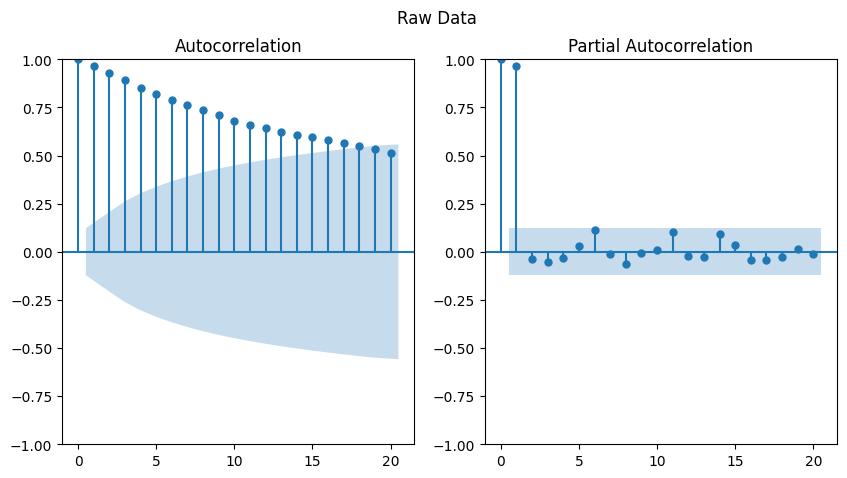

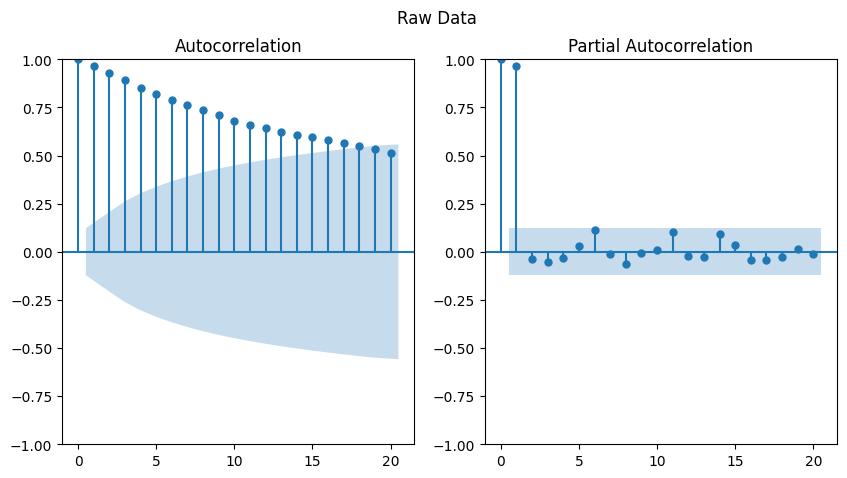

In [17]:
# ACF, PACF plot

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Raw Data')
sm.graphics.tsa.plot_acf(train['price'].values.squeeze(), lags=20, ax=ax[0])
sm.graphics.tsa.plot_pacf(train['price'].values.squeeze(), lags=20, ax=ax[1])

In [20]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima import auto_arima

# Non-stationary -> stationary 보정 (차분, difference)
# differencing

diff_train = train.copy()
diff_train= diff_train['price'].diff() # 차분
diff_train= diff_train.dropna() # 차분 후 생기는 결측치 제거
print(f'Raw data')
print(train['price'].head())
print(f'Differenced data')
print(diff_train.head())

Raw data
day
2020-01-02    55200.0
2020-01-03    55500.0
2020-01-06    55500.0
2020-01-07    55800.0
2020-01-08    56800.0
Name: price, dtype: float64
Differenced data
day
2020-01-03     300.0
2020-01-06       0.0
2020-01-07     300.0
2020-01-08    1000.0
2020-01-09    1800.0
Name: price, dtype: float64


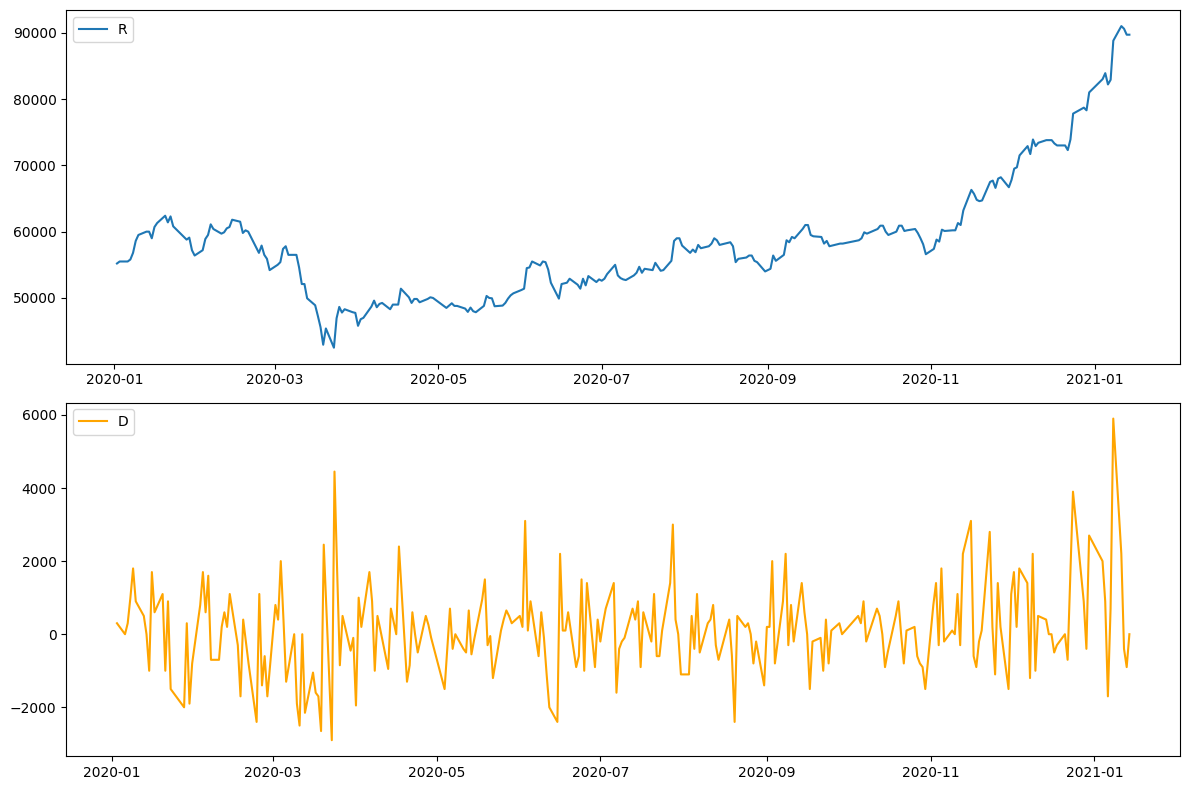

In [21]:
# 차분 시각화

fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(train['price'])
ax1.legend('Raw data (Non-stationary)')

ax2.plot(diff_train, color='orange' )
ax2.legend('Differenced data (stationary)')


plt.tight_layout()
plt.show()

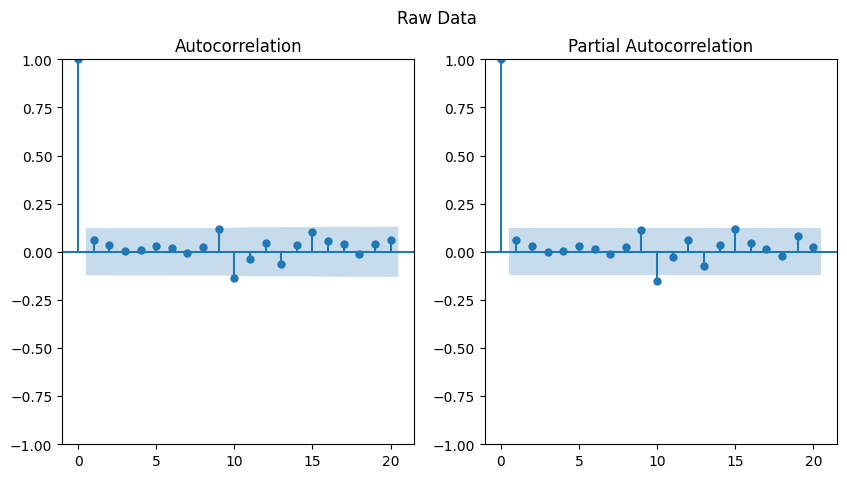

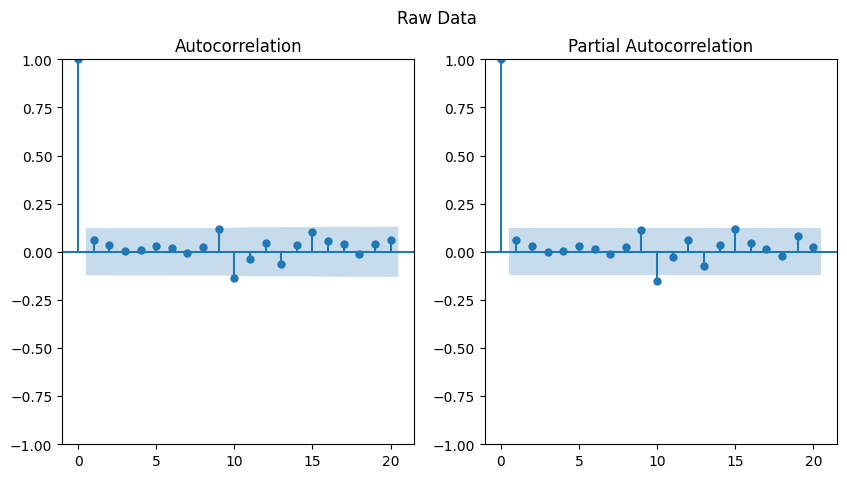

In [22]:
# ACF, PACF plot

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Raw Data')
sm.graphics.tsa.plot_acf(diff_train.values.squeeze(), lags=20, ax=ax[0])
sm.graphics.tsa.plot_pacf(diff_train.values.squeeze(), lags=20, ax=ax[1])

In [30]:
import itertools

auto_arima_model = auto_arima(train['price'], start_p=1, start_q=1,
                             max_p=3, max_1=3, m=3, seasonal=True, # sarima(seasonal=True)
                             d=1, D=1,
                             max_P=3, max_Q=3,
                             trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=False)

auto_arima_model.summary()

 ARIMA(0,1,0)(0,1,0)[3]             : AIC=4487.723, Time=0.10 sec
 ARIMA(0,1,0)(0,1,1)[3]             : AIC=4451.229, Time=0.11 sec
 ARIMA(0,1,0)(0,1,2)[3]             : AIC=4442.243, Time=0.37 sec
 ARIMA(0,1,0)(0,1,3)[3]             : AIC=4437.398, Time=0.61 sec
 ARIMA(0,1,0)(1,1,0)[3]             : AIC=4463.864, Time=0.04 sec
 ARIMA(0,1,0)(1,1,1)[3]             : AIC=inf, Time=0.19 sec
 ARIMA(0,1,0)(1,1,2)[3]             : AIC=inf, Time=0.33 sec
 ARIMA(0,1,0)(1,1,3)[3]             : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(2,1,0)[3]             : AIC=4452.575, Time=0.17 sec
 ARIMA(0,1,0)(2,1,1)[3]             : AIC=inf, Time=0.34 sec
 ARIMA(0,1,0)(2,1,2)[3]             : AIC=inf, Time=0.80 sec
 ARIMA(0,1,0)(2,1,3)[3]             : AIC=inf, Time=1.06 sec
 ARIMA(0,1,0)(3,1,0)[3]             : AIC=4444.248, Time=0.25 sec
 ARIMA(0,1,0)(3,1,1)[3]             : AIC=inf, Time=0.52 sec
 ARIMA(0,1,0)(3,1,2)[3]             : AIC=inf, Time=0.93 sec
 ARIMA(0,1,1)(0,1,0)[3]             : AIC=4489.699

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  257
Model:             SARIMAX(1, 1, 0)x(1, 1, [1], 3)   Log Likelihood               -2214.335
Date:                             Tue, 27 Feb 2024   AIC                           4436.669
Time:                                     18:16:43   BIC                           4450.803
Sample:                                          0   HQIC                          4442.356
                                             - 257                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0058      0.050      0.114      0.909      -0.093       0.104
ar.S.L3        0.5394      0.029     18.535      0.000       0.482       0.596
ma.S.L3       -0.9479      0.036    -26.166      0.000      -1.019      -0.877
sigma2      2.242e+06   1.59e+05     14.140      0.000    1.93e+06    2.55e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                37.27
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               0.66   Skew:                             0.17
Prob(H) (two-sided):                  0.06   Kurtosis:                         4.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
from sklearn.metrics import r2_score

pred = auto_arima_model.predict(len(test), return_conf_int=True)
pred_val = pred[0]
pred_ub = pred[1][:,0]
pred_lb = pred[1][:,1]
pred_index = list(test.index)
r2 = r2_score(test['price'].values, pred_val)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [34]:
p = range(0, 10)
d = range(0, 10)
q = range(0, 10)
pdq = list(itertools.product(p, d, q))

AIC = []
for i in pdq:
    try:
        model = ARIMA(train['price'], order=i)
        model_fit = model.fit()
        print(f'ARIMA pdq: {i} >> AIC: {round(model_fit.aic, 2)}')
        AIC.append((i, round(model_fit.aic, 2)))
    except Exception as e:
        print(f"Failed to fit ARIMA{i}: {e}")

# AIC 리스트가 비어 있지 않은 경우에만 최소 AIC 값을 찾습니다.
if AIC:
    best_aic = min(AIC, key=lambda x: x[1])
    print(f"Best ARIMA Model: {best_aic[0]} with AIC: {best_aic[1]}")
else:
    print("No ARIMA model was successfully fitted.")

Failed to fit ARIMA(0, 0, 0): 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.

Failed to fit ARIMA(0, 0, 1): 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.

Failed to fit ARIMA(0, 0, 2): 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between 

In [35]:
# optimal paramter
optim = [(pdq[i], j) for i, j in enumerate(AIC) if j == min(AIC)]
print('Found Optimal Parameter :',optim)

Found Optimal Parameter : []


IndexError: list index out of range

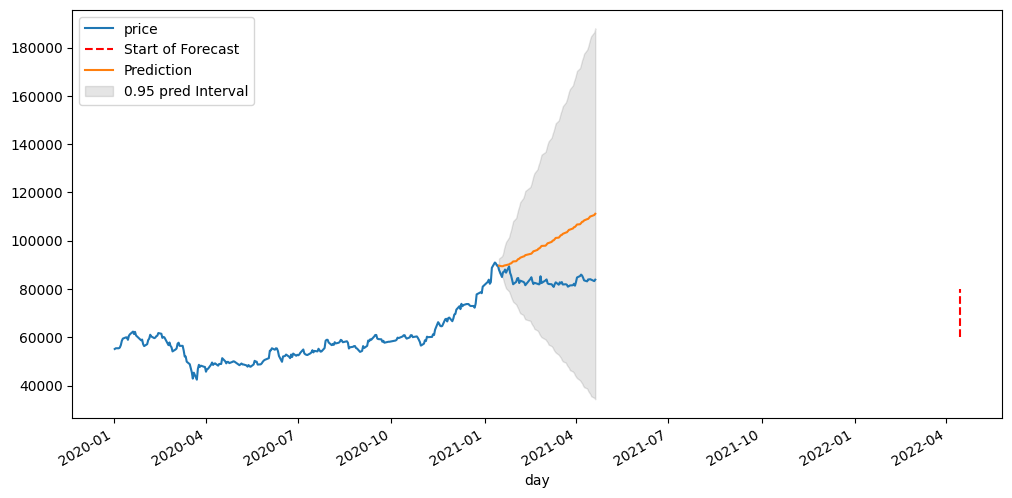

In [36]:
fig, ax = plt.subplots(figsize=(12, 6))
samsung_df['price'].plot(ax =ax)
ax.vlines('2022-04-15', 60000, 80000, linestyle='--',color='r', label='Start of Forecast')
ax.plot(pred_index, pred_val, label='Prediction')
ax.fill_between(pred_index, pred_lb, pred_ub, color='k', alpha=0.1, label='0.95 pred Interval')

ax.legend(loc='upper left')
plt.suptitle(f'auto_ARIMA {optim[0][0]} Pred Result R^2 score : {round(r2, 2)}')
plt.show()